In [93]:
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
from IPython.core.display import deepcopy

def plot_this_3Dcube(X):
 ax.scatter(X[0,:],X[1,:],X[2,:], c = 'r')
 ax.scatter(XM[0,0],XM[1,0],XM[2,0], c = 'r', marker ="x", s = 50)

 ax.plot([XM[0][0],XM[0][1]],[XM[1][0],XM[1][1]],[XM[2][0],XM[2][1]]);
 ax.plot([XM[0][1],XM[0][2]],[XM[1][1],XM[1][2]],[XM[2][1],XM[2][2]]);
 ax.plot([XM[0][2],XM[0][3]],[XM[1][2],XM[1][3]],[XM[2][2],XM[2][3]]);
 ax.plot([XM[0][3],XM[0][0]],[XM[1][3],XM[1][0]],[XM[2][3],XM[2][0]]);

 ax.plot([XM[0][4],XM[0][5]],[XM[1][4],XM[1][5]],[XM[2][4],XM[2][5]]);
 ax.plot([XM[0][5],XM[0][6]],[XM[1][5],XM[1][6]],[XM[2][5],XM[2][6]]);
 ax.plot([XM[0][6],XM[0][7]],[XM[1][6],XM[1][7]],[XM[2][6],XM[2][7]]);
 ax.plot([XM[0][7],XM[0][4]],[XM[1][7],XM[1][4]],[XM[2][7],XM[2][4]]);

 ax.plot([XM[0][2],XM[0][6]],[XM[1][2],XM[1][6]],[XM[2][2],XM[2][6]]);
 ax.plot([XM[0][0],XM[0][4]],[XM[1][0],XM[1][4]],[XM[2][0],XM[2][4]]);
 ax.plot([XM[0][3],XM[0][7]],[XM[1][3],XM[1][7]],[XM[2][3],XM[2][7]]);
 ax.plot([XM[0][1],XM[0][5]],[XM[1][1],XM[1][5]],[XM[2][1],XM[2][5]]);

 ax.plot([XM[0][1],XM[0][8]],[XM[1][1],XM[1][8]],[XM[2][1],XM[2][8]]);
 ax.plot([XM[0][2],XM[0][8]],[XM[1][2],XM[1][8]],[XM[2][2],XM[2][8]]);
 ax.plot([XM[0][5],XM[0][8]],[XM[1][5],XM[1][8]],[XM[2][5],XM[2][8]]);
 ax.plot([XM[0][6],XM[0][8]],[XM[1][6],XM[1][8]],[XM[2][6],XM[2][8]]);

def plot_this_2Dcube(x,y):
  plt.plot(x,y,'*')
  plt.plot(x[0:2], y[0:2])
  plt.plot(x[1:3], y[1:3])
  plt.plot(x[2:4], y[2:4])
  plt.plot([x[0],x[3]], [y[0],y[3]])

  plt.plot(x[4:6], y[4:6])
  plt.plot(x[5:7], y[5:7])
  plt.plot(x[6:8], y[6:8])
  plt.plot([x[4],x[7]], [y[4],y[7]])

  plt.plot([x[0],x[4]], [y[0],y[4]])
  plt.plot([x[1],x[5]], [y[1],y[5]])
  plt.plot([x[2],x[6]], [y[2],y[6]])
  plt.plot([x[3],x[7]], [y[3],y[7]])

  plt.plot([x[1],x[8]], [y[1],y[8]])
  plt.plot([x[2],x[8]], [y[2],y[8]])
  plt.plot([x[5],x[8]], [y[5],y[8]])
  plt.plot([x[6],x[8]], [y[6],y[8]])

# cube coordinates list of list
p = [[0,0,0],[1,0,0],[1,0,1],[0,0,1],[0,1,0],[1,1,0],[1,1,1],[0,1,1]]

X = np.array([[0,0,0],[1,0,0],[1,0,1],[0,0,1],[0,1,0],[1,1,0],[1,1,1],[0,1,1],[1.5,0.5,0.5]])



# Plot the points and lines 

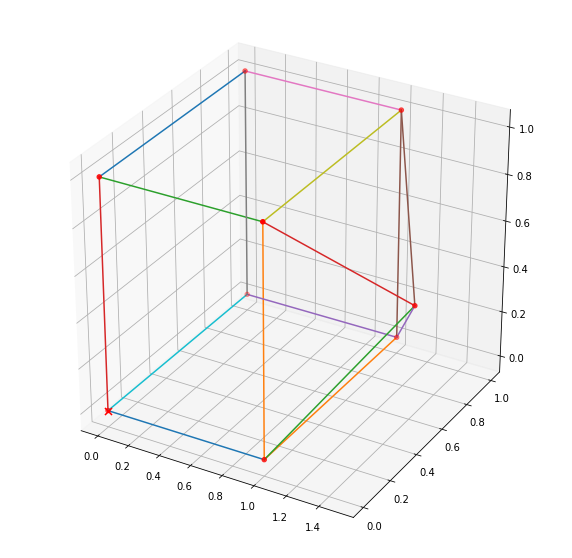

In [94]:

# points columns vectors
XM = X.transpose()


# plotting 3D cube https://likegeeks.com/3d-plotting-in-python/
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
plot_this_3Dcube(XM)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")
# ax.view_init(elev=90., azim=90)
 
plt.show()

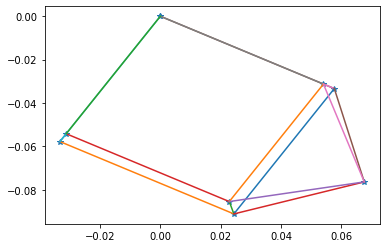

In [96]:
def transformPinhole(inXM):
  XM = deepcopy(inXM)
  #Camera rotation and position
  cameraPosition = np.array([0, 1, -10])
  focalLength = 5
  rotDeg = 30
  Rz = np.array([[np.cos(np.deg2rad(rotDeg)), -np.sin(np.deg2rad(rotDeg)), 0],
                 [np.sin(np.deg2rad(rotDeg)), np.cos(np.deg2rad(rotDeg)),  0],
                 [                         0,                          0,  1]])
  
  #put together our camera transform matrix
  cameraMatrix = np.eye(4)
  cameraMatrix[:3, :3] = Rz
  cameraMatrix[:3, 3] = cameraPosition
  #invert our matrix so we can apply it to the world coordinates of the cube
  invCameraMatrix = np.linalg.inv(cameraMatrix)
  #dumb way to translate all points, there is probably a numpy way to do it
  for i in range(len(XM[0])):
    point = [XM[0][i],XM[1][i],XM[2][i],1]
    point = invCameraMatrix @ point
    XM[0][i] = point[0]
    XM[1][i] = point[1]
    XM[2][i] = point[2]
  #Pulled from original notebook, but this is the focal length/z part
  # took me a while to figure out that is what this was just because it did it a
  # smart way instead of the dumb way I would do
  XM[2,:] = XM[2,:]+focalLength
  x = XM[0,:]/XM[2,:]
  y = XM[1,:]/XM[2,:]
  return x,y

x,y = transformPinhole(XM)
plot_this_2Dcube(x,y)
plt.show()